# Library Imports

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

# For Spotify API
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import csv

# PreProcessing
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier

# Model Errors
from sklearn.model_selection import cross_val_score
from scipy.stats import t, norm

# Graphs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Pickle
import pickle

import random

In [2]:
url = 'https://www.officialcharts.com/charts/afrobeats-chart/'

In [3]:
response = requests.get(url)
response.status_code

200

# Import of Afrobeat Hot songs

In [4]:
offafro = BeautifulSoup(response.content, 'html.parser')
offafro


<!DOCTYPE html>

<!--[if lt IE 7]><html class="no-js ie6 oldie" lang="en"><![endif]-->
<!--[if IE 7]><html class="no-js ie7 oldie" lang="en"><![endif]-->
<!--[if IE 8]><html class="no-js ie8 oldie" lang="en"><![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>Official Afrobeats Chart Top 20 | Official Charts Company</title>
<meta content="The UK’s biggest Afrobeats songs of the week based on sales and streams across a seven day period, compiled by the Official Charts Company." name="description"/>
<meta content="Top 40, UK Top 40, Charts, Top 40 UK, UK Charts, UK singles chart, Music Charts, Official UK Top 40, Charts 2012, Hit 40 UK, UK Chart, Official Singles Chart, Official Albums Chart, Number 1, Number One" name="keywords"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<meta content="https://www.officialcharts.com" property=

In [5]:
offafro.select('.title-artist')

[<div class="title-artist">
 <div class="title">
 <a href="/search/singles/cut-me-off/">CUT ME OFF</a>
 </div>
 <div class="artist">
 <a href="/artist/58996/yxng-bane-ft-d-block-europe/">YXNG BANE FT D-BLOCK EUROPE</a>
 </div>
 <div class="label-cat"><span class="label">DISTURBING LONDON/PARLOPHONE</span></div>
 </div>,
 <div class="title-artist">
 <div class="title">
 <a href="/search/singles/ginger/">GINGER</a>
 </div>
 <div class="artist">
 <a href="/artist/58908/wizkid-ft-burna-boy/">WIZKID FT BURNA BOY</a>
 </div>
 <div class="label-cat"><span class="label">COLUMBIA</span></div>
 </div>,
 <div class="title-artist">
 <div class="title">
 <a href="/search/singles/can't-let-you-go/">CAN'T LET YOU GO</a>
 </div>
 <div class="artist">
 <a href="/artist/50687/stefflon-don/">STEFFLON DON</a>
 </div>
 <div class="label-cat"><span class="label">CAPITOL/VIRGIN</span></div>
 </div>,
 <div class="title-artist">
 <div class="title">
 <a href="/search/singles/party-with-a-jagaban/">PARTY WITH A

In [6]:
offafro.select('.title-artist')[0].get_text(" ", strip = True)

'CUT ME OFF YXNG BANE FT D-BLOCK EUROPE DISTURBING LONDON/PARLOPHONE'

In [7]:
# Getting rank of the song
offafro.find_all('span','position')[0].get_text(" ", strip = True)

'1'

In [8]:
# Getting the name of the song
offafro.find_all('div','title')[0].get_text(" ", strip = True)

'CUT ME OFF'

In [9]:
# Getting the name of the artist
offafro.find_all('div','artist')[0].get_text(" ", strip = True)

'YXNG BANE FT D-BLOCK EUROPE'

In [10]:
# Creating number iteration for function
num_iter = len(offafro.select('.title-artist'))
num_iter

20

In [11]:
# Creating lists for rank, song, and artist
rank = []
song = []
artist = []

for i in range(num_iter):
    rank.append(offafro.find_all('span','position')[i].get_text(" ", strip = True))
    song.append(offafro.find_all('div','title')[i].get_text(" ", strip = True))
    artist.append(offafro.find_all('div','artist')[i].get_text(" ", strip = True))
    
print(rank)
print(song)
print(artist)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
['CUT ME OFF', 'GINGER', "CAN'T LET YOU GO", 'PARTY WITH A JAGABAN', 'HOLY GROUND', 'NO STRESS', 'THE BEST', 'IN MY MASERATI', 'LATE NIGHT TEXT', 'LOADING', 'INFINITY', 'PLUS JAMAIS', '20 10 20', 'MCM', 'DAMAGES', 'DOUDOU', 'DOBALE', 'MORE OF YOU', 'ABULE', 'SOMETHING DIFFERENT']
['YXNG BANE FT D-BLOCK EUROPE', 'WIZKID FT BURNA BOY', 'STEFFLON DON', 'MIDAS THE JAGABAN', 'DAVIDO', 'WIZKID', 'DAVIDO', 'OLAKIRA', 'ZIEZIE FT MS BANKS & KWENGFACE', 'OLAMIDE FT BAD BOY TIMZ', 'OLAMIDE FT OMAH LAY', 'AYA NAKAMURA FT STORMZY', 'BURNA BOY', 'NSG', 'TEMS', 'AYA NAKAMURA', 'SHAYBO', 'EMELI SANDE/STONEBWOY/ROGUES', 'PATORANKING', 'ADEKUNLE GOLD']


In [12]:
offafro20 = pd.DataFrame({'rank': rank,
                         'song':song,
                         'artist':artist})
offafro20.head()

,rank,song,artist
0,1,CUT ME OFF,YXNG BANE FT D-BLOCK EUROPE
1,2,GINGER,WIZKID FT BURNA BOY
2,3,CAN'T LET YOU GO,STEFFLON DON
3,4,PARTY WITH A JAGABAN,MIDAS THE JAGABAN
4,5,HOLY GROUND,DAVIDO


# Working with Spotify

- I need to work on getting more songs for the Afrobeats playlist
- To do so, I will look at top 5 Afrobeats playlists

In [13]:
#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= client_id,
                                                           client_secret= client_secret))

In [14]:
# Testing out connection

results = sp.search(q = 'WizKid', limit = 5)

json_results = json.dumps(results, ensure_ascii = False)
json_results

'{"tracks": {"href": "https://api.spotify.com/v1/search?query=WizKid&type=track&offset=0&limit=5", "items": [{"album": {"album_type": "album", "artists": [{"external_urls": {"spotify": "https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4"}, "href": "https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4", "id": "3TVXtAsR1Inumwj472S9r4", "name": "Drake", "type": "artist", "uri": "spotify:artist:3TVXtAsR1Inumwj472S9r4"}], "available_markets": ["AD", "AE", "AL", "AR", "AT", "AU", "BA", "BE", "BG", "BH", "BO", "BR", "BY", "CA", "CH", "CL", "CO", "CR", "CY", "CZ", "DE", "DK", "DO", "DZ", "EC", "EE", "EG", "ES", "FI", "FR", "GB", "GR", "GT", "HK", "HN", "HR", "HU", "ID", "IE", "IL", "IS", "IT", "JO", "JP", "KW", "KZ", "LB", "LI", "LT", "LU", "LV", "MA", "MC", "MD", "ME", "MK", "MT", "MX", "MY", "NI", "NL", "NO", "NZ", "OM", "PA", "PE", "PH", "PL", "PT", "PY", "QA", "RO", "RS", "RU", "SA", "SE", "SG", "SI", "SK", "SV", "TH", "TN", "TR", "TW", "UA", "US", "UY", "VN", "XK", "ZA"], "extern

In [15]:
# Searching for playlists with "Afro" in the name
afro_results = sp.search(q = 'afrobeat', type = 'playlist', limit = 5)
afro_results

{'playlists': {'href': 'https://api.spotify.com/v1/search?query=afrobeat&type=playlist&offset=0&limit=5',
  'items': [{'collaborative': False,
    'description': 'Afrobeats Summer Playlist - CURATED BY @DJTMARO : DJ TMARO . Afropop and Afrobeats Plug,  Afrobeats with tropical elements, i focus on Afroswing and Afro Fusion. Cover; @Burna Boy. ARTISTS - Wizkid, Davido, Drake, Tekno, Mr Eazi, Omarion, Runtown, Tekno, Sarkodie, Fireboy DML, Dadju, MaleekBerry.',
    'external_urls': {'spotify': 'https://open.spotify.com/playlist/72D7RInsvGTAk1QfCAaBjF'},
    'href': 'https://api.spotify.com/v1/playlists/72D7RInsvGTAk1QfCAaBjF',
    'id': '72D7RInsvGTAk1QfCAaBjF',
    'images': [{'height': None,
      'url': 'https://i.scdn.co/image/ab67706c0000bebb1466b2f509e148fea0900438',
      'width': None}],
    'name': 'Afrobeats  2020 - Afrobeats Summer 🌴🔥',
    'owner': {'display_name': 'Tonye Lolomari',
     'external_urls': {'spotify': 'https://open.spotify.com/user/21mphncq77b36npbaru6mjkbq'},
 

In [16]:
afro_results['playlists']['items'][0]['id']

'72D7RInsvGTAk1QfCAaBjF'

In [17]:
# Iterating over list to get the playlist id's
afro_ids = []
for i in range(len(afro_results['playlists']['items'])):
    afro_ids.append(afro_results['playlists']['items'][i]['id'])
afro_ids   

['72D7RInsvGTAk1QfCAaBjF',
 '4HXMPRVKOAfzoUwws8fqHW',
 '37i9dQZF1DX0ItcQfwbKZJ',
 '1T0VtbTxmqFkZgiUUDg7gN',
 '2HOPfedyiyUcOEMCNgzxhx']

In [18]:
# Getting tracks from all playlists in afro_ids
playlist1 = sp.user_playlist_tracks('spotify','72D7RInsvGTAk1QfCAaBjF')
playlist2 = sp.user_playlist_tracks('spotify','4HXMPRVKOAfzoUwws8fqHW')
playlist3 = sp.user_playlist_tracks('spotify','37i9dQZF1DX0ItcQfwbKZJ')
playlist4 = sp.user_playlist_tracks('spotify','1T0VtbTxmqFkZgiUUDg7gN')
playlist5 = sp.user_playlist_tracks('spotify','2HOPfedyiyUcOEMCNgzxhx')


In [19]:
# Putting PLaylists into list
playlist = [playlist1, playlist2, playlist3, playlist4, playlist5]

# Playlist_count 
iternum = len(playlist)
iternum

5

# Tracklist Items

In [ ]:
# Tracklist Playlist: 1-5

# Purpose: Given a Spotify Playlist, get detailed track information for every song

# Get the first 100 (max) songs in the playlist
results = sp.user_playlist_tracks('spotify', 'spotify:playlist:2HOPfedyiyUcOEMCNgzxhx', limit=100, offset=0)

# Store results in a tracks array
tracks = results['items']

# Continue paginating through until all results are returned
while results['next']:
    results = sp.next(results)
    tracks.extend(results['items'])

# Open and configure output csv
with open('playlist5.csv', mode='w') as playlist_file:
    spotify_writer = csv.writer(playlist_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    # Write csv headers
    spotify_writer.writerow(['Index', 'URL', 'Artist Name', 'Track Name', 'Release Date','Danceability','Energy','Key','Loudness','Mode',
                             'Speechiness','Accousticness','Instrumentalness','Liveness','Valence','Tempo','Duration MS','Time Signature'])
    # index
    i = 0

    # for each track in the playlist, gather more information and write to csv
    for item in (tracks):
        i = i + 1
        track = item['track']

        # if the track is a local file, skip it
        if "local" in track['uri']:
            continue

        # Two more API calls to get more track-related information
        audio_features = sp.audio_features(track['uri'])[0]
        release_date = sp.track(track['uri'])['album']['release_date']
        url = sp.track(track['external_urls']['spotify'])

        # print to console for debugging
        print("   %d %32.32s %s %s" % (i, track['artists'][0]['name'], track['name'],release_date))

        # write to csv
        spotify_writer.writerow([i,track['external_urls']['spotify'], track['artists'][0]['name'], track['name'], release_date
                                , audio_features['danceability']
                                , audio_features['energy']
                                , audio_features['key']
                                , audio_features['loudness']
                                , audio_features['mode']
                                , audio_features['speechiness']
                                , audio_features['acousticness']
                                , audio_features['instrumentalness']
                                , audio_features['liveness']
                                , audio_features['valence']
                                , audio_features['tempo']
                                , audio_features['duration_ms']
                                , audio_features['time_signature']]
                                )

In [20]:
# Reading csv's into df's
data1 = pd.read_csv('playlist1.csv')
data2 = pd.read_csv('playlist2.csv')
data3 = pd.read_csv('playlist3.csv')
data4 = pd.read_csv('playlist4.csv')
data5 = pd.read_csv('playlist5.csv')

In [21]:
# Merging All df to one df "afrolist"
afrolist = pd.concat([data1, data2, data3, data4, data5], axis = 0)
afrolist.shape

(203, 18)

In [22]:
# Header check
afrolist.head(5)

,Index,URL,Artist Name,Track Name,Release Date,Danceability,Energy,Key,Loudness,Mode,Speechiness,Accousticness,Instrumentalness,Liveness,Valence,Tempo,Duration MS,Time Signature
0,1,https://open.spotify.com/track/1gAgb7hnZ9AAJ5M...,WizKid,Mighty Wine,2020-10-29,0.737,0.731,1,-2.264,0,0.0546,0.0771,0.000041,0.138,0.747,99.900,217813,4
1,2,https://open.spotify.com/track/5GmvLu8Ok9KqBak...,Patoranking,Abule,2020-08-27,0.687,0.790,8,-7.122,1,0.1940,0.1190,0.000026,0.104,0.603,99.669,199198,4
2,3,https://open.spotify.com/track/48DoYs5rIX1Pbsb...,Oxlade,DKT,2020-09-04,0.705,0.388,11,-9.973,1,0.2500,0.6650,0.003530,0.146,0.260,66.177,138182,5
3,4,https://open.spotify.com/track/4DthxV3ay0ojLhK...,Dj tmaro,Vibe,2020-11-13,0.587,0.387,1,-7.001,0,0.3030,0.1210,0.000718,0.110,0.617,66.693,195619,5
4,5,https://open.spotify.com/track/51mLQ3w7yR7vjdS...,WizKid,Ginger (feat. Burna Boy),2020-10-29,0.545,0.749,4,-6.621,0,0.1530,0.1030,0.000000,0.232,0.681,100.503,196147,4


In [23]:
# Removing Null values
afrolist = afrolist.dropna()
afrolist

,Index,URL,Artist Name,Track Name,Release Date,Danceability,Energy,Key,Loudness,Mode,Speechiness,Accousticness,Instrumentalness,Liveness,Valence,Tempo,Duration MS,Time Signature
0,1,https://open.spotify.com/track/1gAgb7hnZ9AAJ5M...,WizKid,Mighty Wine,2020-10-29,0.737,0.731,1,-2.264,0,0.0546,0.07710,0.000041,0.1380,0.747,99.900,217813,4
1,2,https://open.spotify.com/track/5GmvLu8Ok9KqBak...,Patoranking,Abule,2020-08-27,0.687,0.790,8,-7.122,1,0.1940,0.11900,0.000026,0.1040,0.603,99.669,199198,4
2,3,https://open.spotify.com/track/48DoYs5rIX1Pbsb...,Oxlade,DKT,2020-09-04,0.705,0.388,11,-9.973,1,0.2500,0.66500,0.003530,0.1460,0.260,66.177,138182,5
3,4,https://open.spotify.com/track/4DthxV3ay0ojLhK...,Dj tmaro,Vibe,2020-11-13,0.587,0.387,1,-7.001,0,0.3030,0.12100,0.000718,0.1100,0.617,66.693,195619,5
4,5,https://open.spotify.com/track/51mLQ3w7yR7vjdS...,WizKid,Ginger (feat. Burna Boy),2020-10-29,0.545,0.749,4,-6.621,0,0.1530,0.10300,0.000000,0.2320,0.681,100.503,196147,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,21,https://open.spotify.com/track/05ZZL4ul4eTDuBJ...,Omah Lay,You,2020-02-14,0.784,0.729,7,-4.644,1,0.1130,0.21000,0.000000,0.0535,0.807,96.920,163299,4
21,22,https://open.spotify.com/track/4Ml6lJw8XFrfON4...,Dj tmaro,Hit & Run,2018-09-21,0.878,0.696,1,-5.562,0,0.0551,0.00971,0.000121,0.0821,0.891,115.042,205662,4
22,23,https://open.spotify.com/track/4LDzCi1czj4OYdq...,Dj tmaro,Actual Riddim,2019-07-19,0.901,0.626,10,-7.522,0,0.2540,0.10800,0.000772,0.0896,0.175,114.021,227396,4
23,24,https://open.spotify.com/track/4DthxV3ay0ojLhK...,Dj tmaro,Vibe,2020-11-13,0.587,0.387,1,-7.001,0,0.3030,0.12100,0.000718,0.1100,0.617,66.693,195619,5


In [24]:
# Resetting Index 
afrolist.set_index('Index')

,URL,Artist Name,Track Name,Release Date,Danceability,Energy,Key,Loudness,Mode,Speechiness,Accousticness,Instrumentalness,Liveness,Valence,Tempo,Duration MS,Time Signature
Index,,,,,,,,,,,,,,,,,
1,https://open.spotify.com/track/1gAgb7hnZ9AAJ5M...,WizKid,Mighty Wine,2020-10-29,0.737,0.731,1,-2.264,0,0.0546,0.07710,0.000041,0.1380,0.747,99.900,217813,4
2,https://open.spotify.com/track/5GmvLu8Ok9KqBak...,Patoranking,Abule,2020-08-27,0.687,0.790,8,-7.122,1,0.1940,0.11900,0.000026,0.1040,0.603,99.669,199198,4
3,https://open.spotify.com/track/48DoYs5rIX1Pbsb...,Oxlade,DKT,2020-09-04,0.705,0.388,11,-9.973,1,0.2500,0.66500,0.003530,0.1460,0.260,66.177,138182,5
4,https://open.spotify.com/track/4DthxV3ay0ojLhK...,Dj tmaro,Vibe,2020-11-13,0.587,0.387,1,-7.001,0,0.3030,0.12100,0.000718,0.1100,0.617,66.693,195619,5
5,https://open.spotify.com/track/51mLQ3w7yR7vjdS...,WizKid,Ginger (feat. Burna Boy),2020-10-29,0.545,0.749,4,-6.621,0,0.1530,0.10300,0.000000,0.2320,0.681,100.503,196147,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,https://open.spotify.com/track/05ZZL4ul4eTDuBJ...,Omah Lay,You,2020-02-14,0.784,0.729,7,-4.644,1,0.1130,0.21000,0.000000,0.0535,0.807,96.920,163299,4
22,https://open.spotify.com/track/4Ml6lJw8XFrfON4...,Dj tmaro,Hit & Run,2018-09-21,0.878,0.696,1,-5.562,0,0.0551,0.00971,0.000121,0.0821,0.891,115.042,205662,4
23,https://open.spotify.com/track/4LDzCi1czj4OYdq...,Dj tmaro,Actual Riddim,2019-07-19,0.901,0.626,10,-7.522,0,0.2540,0.10800,0.000772,0.0896,0.175,114.021,227396,4


In [25]:
# Changing headers
afrolist.columns = afrolist.columns.str.lower()
afrolist.columns = afrolist.columns.str.replace(" ","")

In [26]:
# df check
afrolist

,index,url,artistname,trackname,releasedate,danceability,energy,key,loudness,mode,speechiness,accousticness,instrumentalness,liveness,valence,tempo,durationms,timesignature
0,1,https://open.spotify.com/track/1gAgb7hnZ9AAJ5M...,WizKid,Mighty Wine,2020-10-29,0.737,0.731,1,-2.264,0,0.0546,0.07710,0.000041,0.1380,0.747,99.900,217813,4
1,2,https://open.spotify.com/track/5GmvLu8Ok9KqBak...,Patoranking,Abule,2020-08-27,0.687,0.790,8,-7.122,1,0.1940,0.11900,0.000026,0.1040,0.603,99.669,199198,4
2,3,https://open.spotify.com/track/48DoYs5rIX1Pbsb...,Oxlade,DKT,2020-09-04,0.705,0.388,11,-9.973,1,0.2500,0.66500,0.003530,0.1460,0.260,66.177,138182,5
3,4,https://open.spotify.com/track/4DthxV3ay0ojLhK...,Dj tmaro,Vibe,2020-11-13,0.587,0.387,1,-7.001,0,0.3030,0.12100,0.000718,0.1100,0.617,66.693,195619,5
4,5,https://open.spotify.com/track/51mLQ3w7yR7vjdS...,WizKid,Ginger (feat. Burna Boy),2020-10-29,0.545,0.749,4,-6.621,0,0.1530,0.10300,0.000000,0.2320,0.681,100.503,196147,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,21,https://open.spotify.com/track/05ZZL4ul4eTDuBJ...,Omah Lay,You,2020-02-14,0.784,0.729,7,-4.644,1,0.1130,0.21000,0.000000,0.0535,0.807,96.920,163299,4
21,22,https://open.spotify.com/track/4Ml6lJw8XFrfON4...,Dj tmaro,Hit & Run,2018-09-21,0.878,0.696,1,-5.562,0,0.0551,0.00971,0.000121,0.0821,0.891,115.042,205662,4
22,23,https://open.spotify.com/track/4LDzCi1czj4OYdq...,Dj tmaro,Actual Riddim,2019-07-19,0.901,0.626,10,-7.522,0,0.2540,0.10800,0.000772,0.0896,0.175,114.021,227396,4
23,24,https://open.spotify.com/track/4DthxV3ay0ojLhK...,Dj tmaro,Vibe,2020-11-13,0.587,0.387,1,-7.001,0,0.3030,0.12100,0.000718,0.1100,0.617,66.693,195619,5


In [27]:
# Removing Duplicates
afrolist['trackname'].drop_duplicates()

0                  Mighty Wine
1                        Abule
2                          DKT
3                         Vibe
4     Ginger (feat. Burna Boy)
                ...           
19          One Take Freestyle
20                         You
21                   Hit & Run
22               Actual Riddim
24                 Man On Fire
Name: trackname, Length: 190, dtype: object

In [28]:
afrolist = afrolist.drop_duplicates(subset = ['trackname'])
afrolist

,index,url,artistname,trackname,releasedate,danceability,energy,key,loudness,mode,speechiness,accousticness,instrumentalness,liveness,valence,tempo,durationms,timesignature
0,1,https://open.spotify.com/track/1gAgb7hnZ9AAJ5M...,WizKid,Mighty Wine,2020-10-29,0.737,0.731,1,-2.264,0,0.0546,0.07710,0.000041,0.1380,0.747,99.900,217813,4
1,2,https://open.spotify.com/track/5GmvLu8Ok9KqBak...,Patoranking,Abule,2020-08-27,0.687,0.790,8,-7.122,1,0.1940,0.11900,0.000026,0.1040,0.603,99.669,199198,4
2,3,https://open.spotify.com/track/48DoYs5rIX1Pbsb...,Oxlade,DKT,2020-09-04,0.705,0.388,11,-9.973,1,0.2500,0.66500,0.003530,0.1460,0.260,66.177,138182,5
3,4,https://open.spotify.com/track/4DthxV3ay0ojLhK...,Dj tmaro,Vibe,2020-11-13,0.587,0.387,1,-7.001,0,0.3030,0.12100,0.000718,0.1100,0.617,66.693,195619,5
4,5,https://open.spotify.com/track/51mLQ3w7yR7vjdS...,WizKid,Ginger (feat. Burna Boy),2020-10-29,0.545,0.749,4,-6.621,0,0.1530,0.10300,0.000000,0.2320,0.681,100.503,196147,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,20,https://open.spotify.com/track/22PVyClwUzwXyoT...,Dj tmaro,One Take Freestyle,2020-07-13,0.840,0.466,9,-11.557,0,0.2670,0.76800,0.001440,0.1050,0.732,101.968,188291,4
20,21,https://open.spotify.com/track/05ZZL4ul4eTDuBJ...,Omah Lay,You,2020-02-14,0.784,0.729,7,-4.644,1,0.1130,0.21000,0.000000,0.0535,0.807,96.920,163299,4
21,22,https://open.spotify.com/track/4Ml6lJw8XFrfON4...,Dj tmaro,Hit & Run,2018-09-21,0.878,0.696,1,-5.562,0,0.0551,0.00971,0.000121,0.0821,0.891,115.042,205662,4
22,23,https://open.spotify.com/track/4LDzCi1czj4OYdq...,Dj tmaro,Actual Riddim,2019-07-19,0.901,0.626,10,-7.522,0,0.2540,0.10800,0.000772,0.0896,0.175,114.021,227396,4


In [29]:
afrolist = afrolist.set_index('index')

# Working on K-Clustering Model

In [30]:
# Checking for variations in columns
afrolist.describe()

,danceability,energy,key,loudness,mode,speechiness,accousticness,instrumentalness,liveness,valence,tempo,durationms,timesignature
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,0.719874,0.690432,5.163158,-6.900700,0.326316,0.122096,0.253096,0.117023,0.143664,0.645242,110.936484,233225.142105,4.036842
std,0.115541,0.131346,3.710376,2.161735,0.470103,0.094107,0.213303,0.265352,0.091766,0.196936,22.952256,106768.831966,0.389967
min,0.341000,0.387000,0.000000,-14.520000,0.000000,0.029900,0.000786,0.000000,0.026000,0.121000,63.168000,88503.000000,1.000000
25%,0.640250,0.589500,1.000000,-8.090500,0.000000,0.056525,0.084675,0.000002,0.090825,0.505500,99.599250,180169.000000,4.000000
50%,0.742000,0.696000,5.000000,-6.726500,0.000000,0.088200,0.195000,0.000135,0.111000,0.671000,105.055000,198211.500000,4.000000
75%,0.800250,0.777000,9.000000,-5.420250,1.000000,0.149500,0.369750,0.015725,0.148000,0.792750,117.944750,240708.000000,4.000000
max,0.938000,0.959000,11.000000,-1.876000,1.000000,0.472000,0.830000,0.935000,0.613000,0.971000,205.707000,828360.000000,5.000000


- Notice that tempo has a high variation
- Durationms has high min and max numbers but and high variance
- I will need to scale the data to make it easier to work with K-Cluster Model

In [31]:
# Getting only numerical columns
afro_num = afrolist.select_dtypes(include = 'number')
afro_num

,danceability,energy,key,loudness,mode,speechiness,accousticness,instrumentalness,liveness,valence,tempo,durationms,timesignature
index,,,,,,,,,,,,,
1,0.737,0.731,1,-2.264,0,0.0546,0.07710,0.000041,0.1380,0.747,99.900,217813,4
2,0.687,0.790,8,-7.122,1,0.1940,0.11900,0.000026,0.1040,0.603,99.669,199198,4
3,0.705,0.388,11,-9.973,1,0.2500,0.66500,0.003530,0.1460,0.260,66.177,138182,5
4,0.587,0.387,1,-7.001,0,0.3030,0.12100,0.000718,0.1100,0.617,66.693,195619,5
5,0.545,0.749,4,-6.621,0,0.1530,0.10300,0.000000,0.2320,0.681,100.503,196147,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,0.840,0.466,9,-11.557,0,0.2670,0.76800,0.001440,0.1050,0.732,101.968,188291,4
21,0.784,0.729,7,-4.644,1,0.1130,0.21000,0.000000,0.0535,0.807,96.920,163299,4
22,0.878,0.696,1,-5.562,0,0.0551,0.00971,0.000121,0.0821,0.891,115.042,205662,4


In [32]:
# Scaling the dataframe to be in similar variance
afro_prep = StandardScaler().fit_transform(afro_num)

In [33]:
# Turing afro_scale into DataFrame
afro_scale = pd.DataFrame(afro_prep, columns = afro_num.columns)
afro_scale

,danceability,energy,key,loudness,mode,speechiness,accousticness,instrumentalness,liveness,valence,tempo,durationms,timesignature
0,0.148619,0.309682,-1.124996,2.150564,-0.695971,-0.719128,-0.827278,-0.442020,-0.061882,0.518071,-0.482116,-0.144732,-0.094724
1,-0.285271,0.760062,0.766590,-0.102642,1.436842,0.766086,-0.630325,-0.442080,-0.433368,-0.215063,-0.492207,-0.319541,-0.094724
2,-0.129071,-2.308631,1.577270,-1.424974,1.436842,1.362728,1.936175,-0.428838,0.025527,-1.961349,-1.955265,-0.892529,2.476367
3,-1.153050,-2.316265,-1.124996,-0.046521,-0.695971,1.927408,-0.620924,-0.439464,-0.367812,-0.143787,-1.932724,-0.353151,2.476367
4,-1.517518,0.447086,-0.314316,0.129729,-0.695971,0.329258,-0.705534,-0.442177,0.965169,0.182051,-0.455774,-0.348192,-0.094724
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,1.042431,-1.713213,1.036817,-2.159655,-0.695971,1.543852,2.420332,-0.436736,-0.422442,0.441703,-0.391778,-0.421966,-0.094724
186,0.556475,0.294415,0.496363,1.046688,1.436842,-0.096915,-0.202575,-0.442177,-0.985135,0.823543,-0.612293,-0.656661,-0.094724
187,1.372188,0.042507,-1.124996,0.620907,-0.695971,-0.713801,-1.144048,-0.441719,-0.672650,1.251205,0.179345,-0.258839,-0.094724
188,1.571777,-0.491843,1.307043,-0.288167,-0.695971,1.405346,-0.682031,-0.439260,-0.590704,-2.394102,0.134743,-0.054740,-0.094724


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

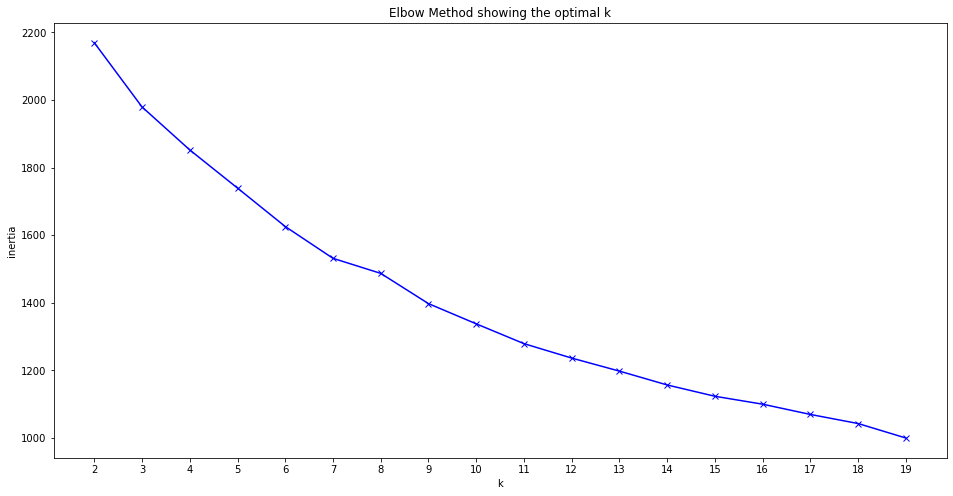

In [34]:
# Mapping out Elbow Curve to pick optimial number of clusters
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(afro_scale)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

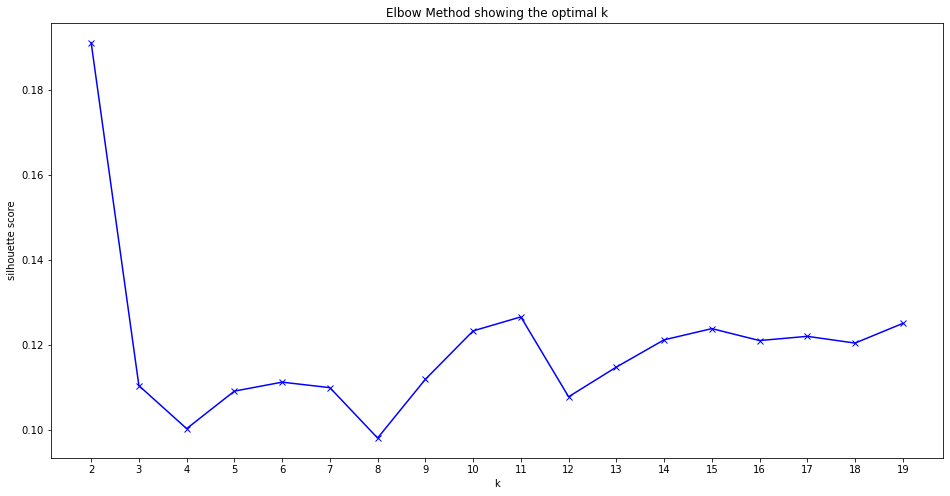

In [35]:
# Using Silhoutte score to determine if score is right
K = range(2, 20)
silhouette = []


for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(afro_scale)
    silhouette.append(silhouette_score(afro_scale, kmeans.predict(afro_scale)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [36]:
# Fitting afro_scale for KMeans
kmeans = KMeans(n_clusters = 11, random_state = 1234)
kmeans.fit(afro_scale)

KMeans(n_clusters=11, random_state=1234)

In [37]:
# Cluster value count check
clusters = kmeans.predict(afro_scale)
pd.Series(clusters).value_counts().sort_index()

0     14
1     39
2     23
3     15
4      8
5     17
6     31
7     14
8      6
9     22
10     1
dtype: int64

- Notice slightly evenly spread out but have low counts in a few of the clusters

In [38]:
# Setting cluster onto dataframe
afro_scale['cluster'] = clusters
afro_scale.head()

,danceability,energy,key,loudness,mode,speechiness,accousticness,instrumentalness,liveness,valence,tempo,durationms,timesignature,cluster
0,0.148619,0.309682,-1.124996,2.150564,-0.695971,-0.719128,-0.827278,-0.442020,-0.061882,0.518071,-0.482116,-0.144732,-0.094724,1
1,-0.285271,0.760062,0.766590,-0.102642,1.436842,0.766086,-0.630325,-0.442080,-0.433368,-0.215063,-0.492207,-0.319541,-0.094724,9
2,-0.129071,-2.308631,1.577270,-1.424974,1.436842,1.362728,1.936175,-0.428838,0.025527,-1.961349,-1.955265,-0.892529,2.476367,0
3,-1.153050,-2.316265,-1.124996,-0.046521,-0.695971,1.927408,-0.620924,-0.439464,-0.367812,-0.143787,-1.932724,-0.353151,2.476367,0
4,-1.517518,0.447086,-0.314316,0.129729,-0.695971,0.329258,-0.705534,-0.442177,0.965169,0.182051,-0.455774,-0.348192,-0.094724,7


In [39]:
# Checking for multicollinearity to see if we can remove features

afro_scale.corr()

,danceability,energy,key,loudness,mode,speechiness,accousticness,instrumentalness,liveness,valence,tempo,durationms,timesignature,cluster
danceability,1.000000,-0.199280,-0.125247,0.040164,0.035636,-0.086664,0.086170,-0.259992,-0.085444,0.015572,-0.179620,-0.183302,-0.044754,-0.076233
energy,-0.199280,1.000000,0.063030,0.446940,0.033440,-0.249064,-0.314179,0.124527,0.118468,0.364216,0.151806,0.388893,-0.131190,-0.030528
key,-0.125247,0.063030,1.000000,0.046435,-0.152020,0.058793,-0.050745,0.024963,-0.012897,-0.077265,0.043890,0.035398,0.032391,0.274393
loudness,0.040164,0.446940,0.046435,1.000000,-0.011468,0.017391,-0.061624,-0.264831,-0.055825,0.153982,0.008863,-0.164009,0.032592,-0.092062
mode,0.035636,0.033440,-0.152020,-0.011468,1.000000,-0.151324,-0.100693,0.128258,0.020820,-0.101900,-0.042558,-0.057265,-0.065925,0.012234
speechiness,-0.086664,-0.249064,0.058793,0.017391,-0.151324,1.000000,0.230856,-0.231132,-0.070115,-0.101507,0.012783,-0.204471,0.216944,0.023845
accousticness,0.086170,-0.314179,-0.050745,-0.061624,-0.100693,0.230856,1.000000,-0.077355,-0.117018,-0.002626,-0.059524,-0.096599,0.007705,0.027960
instrumentalness,-0.259992,0.124527,0.024963,-0.264831,0.128258,-0.231132,-0.077355,1.000000,0.048479,0.075786,0.064450,0.211748,-0.143895,0.084922
liveness,-0.085444,0.118468,-0.012897,-0.055825,0.020820,-0.070115,-0.117018,0.048479,1.000000,0.092954,-0.025349,0.126958,-0.038818,0.244919
valence,0.015572,0.364216,-0.077265,0.153982,-0.101900,-0.101507,-0.002626,0.075786,0.092954,1.000000,0.124295,0.107628,-0.234289,-0.244593


- Notice that a few columns have low correlation with clusters so may remove to help improve model

In [40]:
# Dropping columns with low collinearity with "cluster" / Also will remove "cluster" to re-run KNN clusters
afrov2 = afro_scale.drop(columns = ['timesignature','instrumentalness','mode','key','speechiness','tempo','cluster'], axis = 1)
afrov2.head()

,danceability,energy,loudness,accousticness,liveness,valence,durationms
0,0.148619,0.309682,2.150564,-0.827278,-0.061882,0.518071,-0.144732
1,-0.285271,0.760062,-0.102642,-0.630325,-0.433368,-0.215063,-0.319541
2,-0.129071,-2.308631,-1.424974,1.936175,0.025527,-1.961349,-0.892529
3,-1.153050,-2.316265,-0.046521,-0.620924,-0.367812,-0.143787,-0.353151
4,-1.517518,0.447086,0.129729,-0.705534,0.965169,0.182051,-0.348192


# Running KMeans on reduced DataFrame

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

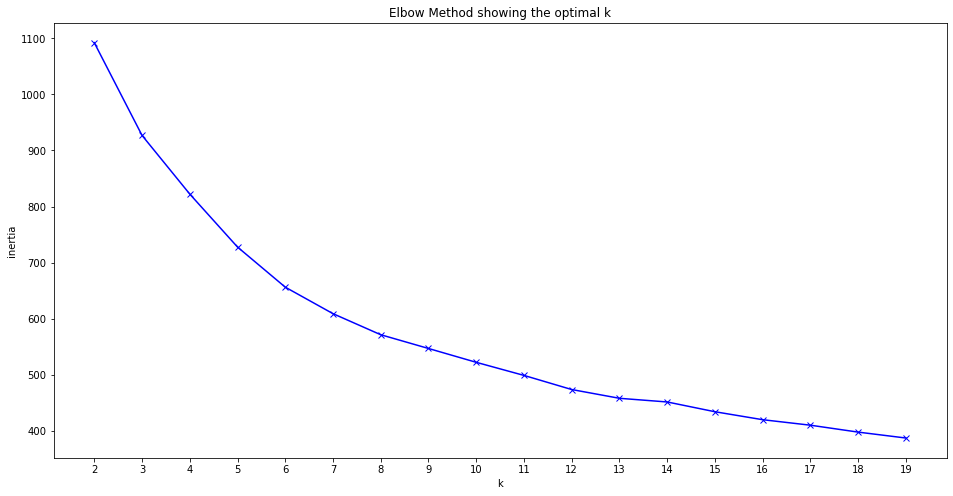

In [41]:
# Checking Elbow curve 

K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(afrov2)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silheoutte Score showing the optimal k')

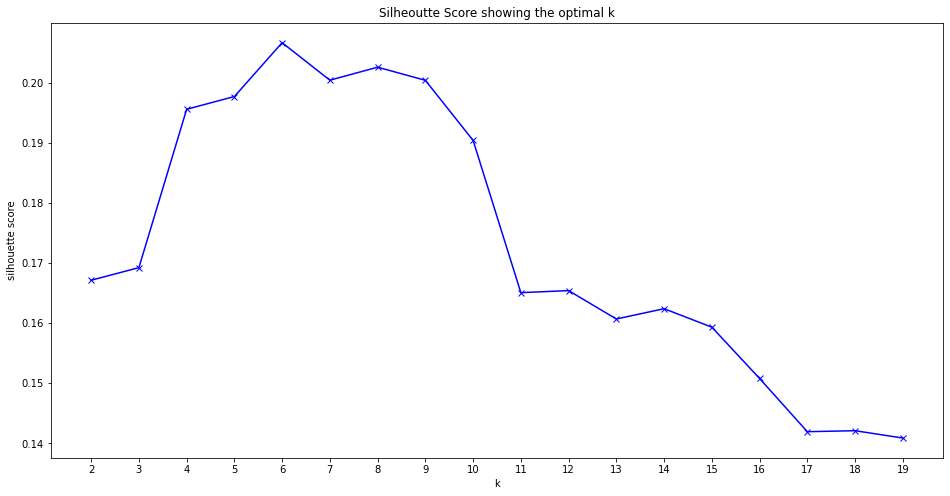

In [42]:
# Checking Silhouette Score

K = range(2, 20)
silhouette = []


for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(afrov2)
    silhouette.append(silhouette_score(afrov2, kmeans.predict(afrov2)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silheoutte Score showing the optimal k')

- Using 6 for optimal K number as 15 seemed too much and spread our model thin

In [43]:
# Running KMean on new reduced df
kmeans = KMeans(n_clusters = 6, random_state = 42)
kmeans.fit(afrov2)

KMeans(n_clusters=6, random_state=42)

In [44]:
# Predicting clusters for new df 
clusters = kmeans.predict(afrov2)
pd.Series(clusters).value_counts().sort_index()

0    25
1    24
2    56
3    19
4    25
5    41
dtype: int64

In [45]:
# Setting cluster classification on df
afrov2['cluster'] = clusters
afrov2.head()

,danceability,energy,loudness,accousticness,liveness,valence,durationms,cluster
0,0.148619,0.309682,2.150564,-0.827278,-0.061882,0.518071,-0.144732,2
1,-0.285271,0.760062,-0.102642,-0.630325,-0.433368,-0.215063,-0.319541,4
2,-0.129071,-2.308631,-1.424974,1.936175,0.025527,-1.961349,-0.892529,0
3,-1.153050,-2.316265,-0.046521,-0.620924,-0.367812,-0.143787,-0.353151,5
4,-1.517518,0.447086,0.129729,-0.705534,0.965169,0.182051,-0.348192,4


# Running RandomForestClassifier Model

In [46]:
# Splliting df with XY Split with 'clusters' as the feature to predict
X = afrov2.drop(['cluster'], axis = 1)
y = afrov2['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [47]:
clf = RandomForestClassifier(max_depth = 2, random_state = 42)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=42)

In [48]:
# Model Metrics
print("The accuracy of the Random forest is: {:4.2f}".format(clf.score(X_test, y_test)))
print()

alpha = 0.05
K = 10
# For cross validation
clf = RandomForestClassifier(max_depth=2, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)

if (K < 30):
    t_critical = abs(t.ppf(alpha, K-1))
    interval = t_critical*(np.std(cross_val_score(clf, X_train, y_train, cv=10))/np.sqrt(K))
else:
    z_critical = abs(norm.ppf(1-alpha/2))
    interval = z_critical*(np.std(cross_val_score(clf, X_train, y_train, cv=10))/np.sqrt(K)) 
print("The accuracy of the Random Forest model (CV witk K=10) is: {:4.2f} +/- {:4.2f}".format(np.mean(cross_val_scores),interval))

The accuracy of the Random forest is: 0.61

The accuracy of the Random Forest model (CV witk K=10) is: 0.77 +/- 0.04


- Decent accuracy score so will go ahead with model to predcit

# Saving Model for future Testing

In [49]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [50]:
# Testing model on Test Data Split
modelB = pickle.load(open(filename, 'rb'))
result = modelB.score(X_test, y_test)

print(result)

0.7894736842105263


In [51]:
# Predicting Clusters of new dataset
prediction = modelB.predict(X_test)
prediction

array([5, 0, 2, 2, 5, 0, 2, 0, 1, 1, 4, 2, 5, 2, 0, 1, 2, 2, 0, 5, 5, 2,
       1, 2, 3, 1, 1, 2, 5, 5, 0, 2, 5, 1, 5, 2, 3, 3, 2, 2, 4, 2, 4, 5,
       5, 5, 1, 3, 5, 2, 4, 2, 2, 2, 2, 3, 2])

In [52]:
def HitsPicker():
    hit_search = input('Afrobeat song: ')
    if hit_search in list(offafro20['song']):
        print('You picked a hit!')
        print()
        print('Another set of songs you may enjoy: ')
        print(random.sample(list(offafro20['song']),3))
    elif hit_search in list(afrolist['trackname']):
        print('A Hot Pick! Here are some other songs: ')
        print()
        print(random.sample(list(afrolist['trackname']),3))
    else: 
        print('Not a hot pick!')
        import pickle
        with open('model.pkl', 'rb') as file:
            kmeans = pickle.load(file)
        with open('scaler.pkl', 'rb') as file:
            scaler = pickle.load(file)
        song = sp.search(q=hit_search, limit = 1)
        song = song['tracks']['items'][0]['uri']
        features = sp.audio_features(song)[0]
        df = pd.DataFrame(data = features, index= [0])[['danceability', 'energy', 
                                                        'loudness', 'speechiness','acousticness', 
                                                        'valence', 'tempo']]
        display(df)
        scaled_features = scaler.transform(df)
        cluster_song = kmeans.predict(scaled_features)[0]
        recomended_song = afrolist[afrolist['cluster'] == cluster_song].sample()
        print(recommended_song)

In [60]:
HitsPicker()

Afrobeat song: Mighty Wine
A Hot Pick! Here are some other songs: 

['Cool Me Down (feat. Wizkid)', 'We Move', 'Alabeke']
